In [1]:
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
from torch.utils.data import Dataset, DataLoader

In [2]:
DATASET_DIR = "../datasets"

TICKERS = [
    "^SPX", # Standard & Poor 500 Index
    "^NDX", # Nasdaq Index
    "AAPL", # Apple
    "AMZN", # Amazon
    "META", # Meta
    "TSLA", # Tesla
]

## Data Preprocessing and Exploratory Data Analysis (EDA)

In [3]:
# Load the data
ticker_dfs = [pl.read_csv(f"{DATASET_DIR}/{ticker}_1d.csv") for ticker in TICKERS]

In [4]:
ticker_dfs[0].head()

timestamp,open,high,low,close,volume
str,f64,f64,f64,f64,i64
"""2022-01-03 00:…",4778.140137,4796.640137,4758.169922,4796.560059,3831020000
"""2022-01-04 00:…",4804.509766,4818.620117,4774.27002,4793.540039,4683170000
"""2022-01-05 00:…",4787.990234,4797.700195,4699.439941,4700.580078,4887960000
"""2022-01-06 00:…",4693.390137,4725.009766,4671.259766,4696.049805,4295280000
"""2022-01-07 00:…",4697.660156,4707.950195,4662.740234,4677.029785,4181510000


In [5]:
ticker_dfs[0].describe()

statistic,timestamp,open,high,low,close,volume
str,str,f64,f64,f64,f64,f64
"""count""","""501""",501.0,501.0,501.0,501.0,501.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0
"""mean""",null,4190.540295,4219.012915,4160.322049,4190.937249,4.3163e9
"""std""",null,278.721615,274.053306,282.43511,278.530239,8.9136e8
"""min""","""2022-01-03 00:…",3520.370117,3608.340088,3491.580078,3577.030029,1.6395e9
"""25%""",null,3966.389893,4001.47998,3937.560059,3970.040039,3.8084e9
"""50%""",null,4155.930176,4183.600098,4128.970215,4158.240234,4.1437e9
"""75%""",null,4426.029785,4453.919922,4393.819824,4412.529785,4.6519e9
"""max""","""2023-12-29 00:…",4804.509766,4818.620117,4780.97998,4796.560059,9.3543e9


### Plotting the closing price of each stock

The plot presented below uses daily closing price from `2022-01-01` to `2024-01-01`.

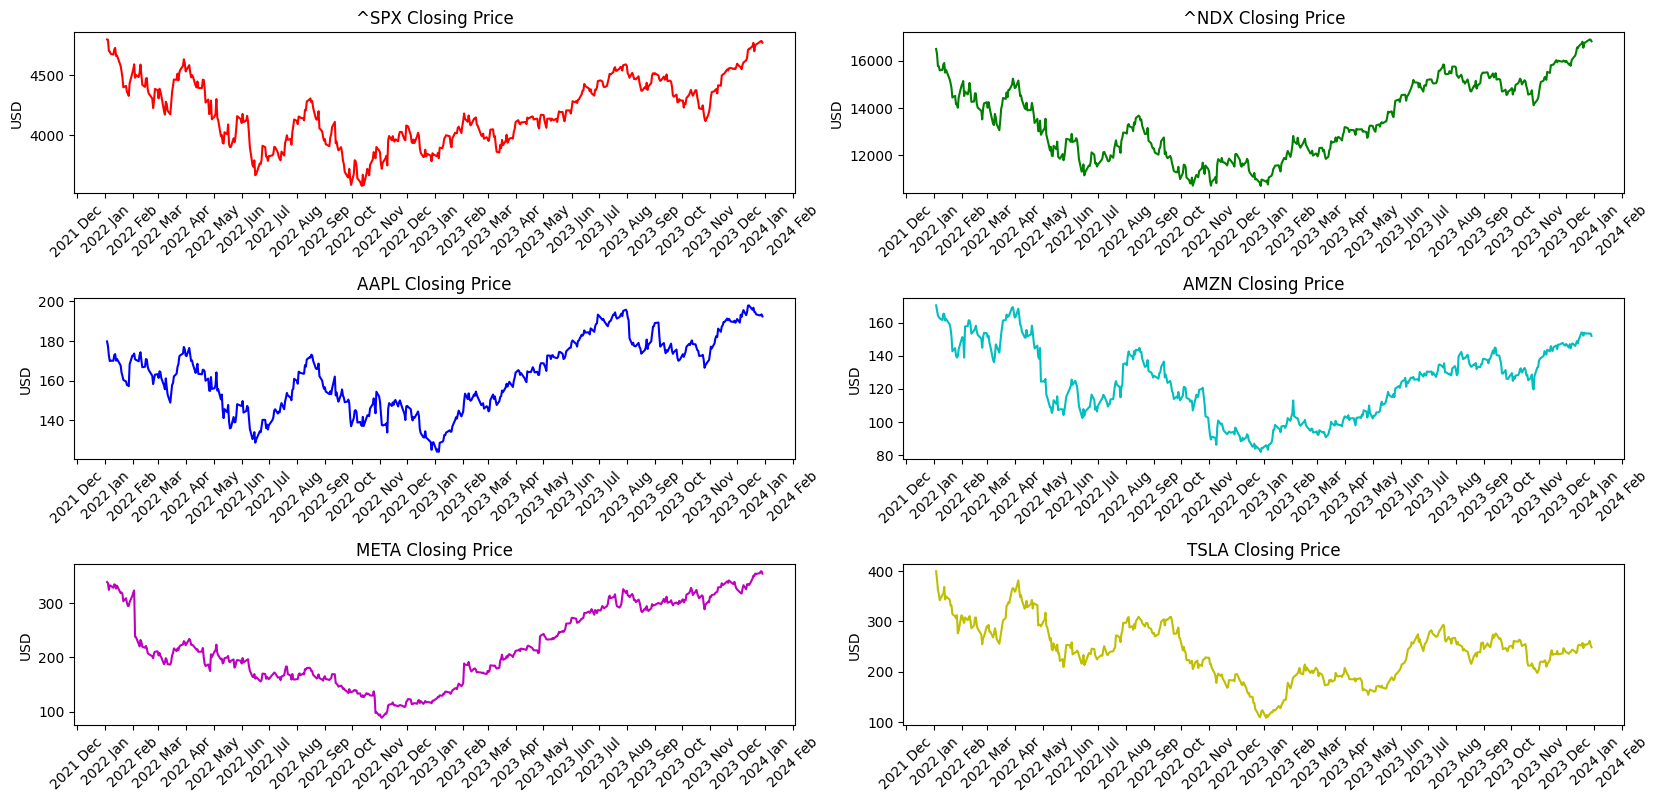

In [6]:
fig, axs = plt.subplots(3, 2, figsize=(20, 9))  
axs = axs.flat

colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot the prices for each ticker
for i, (df, ticker) in enumerate(zip(ticker_dfs, TICKERS)):
    df = df.with_columns(timestamp=df['timestamp'].str.to_datetime())
    ax = axs[i]
    ax.plot(df["timestamp"], df["close"], label=ticker, color=mcolors.BASE_COLORS[colors[i]])
    ax.set(ylabel="USD", title=f"{ticker} Closing Price")
    ax.tick_params(axis='x', labelrotation=45)
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y %b"))

fig.subplots_adjust(hspace=0.65, wspace=0.15)
plt.show()

### Aggregate all tickers into one dataframe

Since we only need the closing price of each stock, we combine them into one dataframe indexed by the timestamp.

In [7]:
# Aggregate all tickers into one dataframe

# Drop unused columns
ticker_dfs = [df.drop(["open", "high", "low", "volume"]) for df in ticker_dfs]

# Rename the close column to the ticker name
ticker_dfs = [df.rename({"close": ticker}) for df, ticker in zip(ticker_dfs, TICKERS)]

# Join with other tickers to form a dataframe with different tickers' closing price
df = ticker_dfs[0]
for i in range(1, len(ticker_dfs)):
    df = df.join(ticker_dfs[i], on="timestamp")

df = df.with_columns(timestamp=pl.col("timestamp").str.to_datetime(format='%Y-%m-%d %H:%M:%S%:z', time_unit='ms'))

In [8]:
df.head()

timestamp,^SPX,^NDX,AAPL,AMZN,META,TSLA
"datetime[ms, UTC]",f64,f64,f64,f64,f64,f64
2022-01-03 05:00:00 UTC,4796.560059,16501.769531,179.724548,170.404495,338.181183,399.926666
2022-01-04 05:00:00 UTC,4793.540039,16279.730469,177.443558,167.522003,336.173309,383.196655
2022-01-05 05:00:00 UTC,4700.580078,15771.780273,172.723587,164.356995,323.826416,362.706665
2022-01-06 05:00:00 UTC,4696.049805,15765.360352,169.840256,163.253998,332.107635,354.899994
2022-01-07 05:00:00 UTC,4677.029785,15592.19043,170.008118,162.554001,331.438354,342.320007


In [9]:
df.describe()

statistic,timestamp,^SPX,^NDX,AAPL,AMZN,META,TSLA
str,str,f64,f64,f64,f64,f64,f64
"""count""","""501""",501.0,501.0,501.0,501.0,501.0,501.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""","""2022-12-31 19:…",4190.937249,13470.563917,162.596415,123.740526,220.490966,240.329687
"""std""",null,278.530239,1617.704962,17.888387,21.66129,72.328137,55.385289
"""min""","""2022-01-03 05:…",3577.030029,10679.339844,124.166634,81.82,88.815765,108.099998
"""25%""","""2022-07-05 04:…",3970.040039,12030.05957,148.119385,104.300003,163.556458,197.369995
"""50%""","""2022-12-30 05:…",4158.240234,13259.129883,163.511444,125.779999,207.619705,241.866669
"""75%""","""2023-07-03 04:…",4412.529785,14936.69043,175.624237,139.985992,295.576416,276.040009
"""max""","""2023-12-29 05:…",4796.560059,16906.800781,197.857529,170.404495,357.940216,399.926666


### Correlation Check

Usually stock prices are correlated to one another for example, when **AAPL** goes up, the price for **^SPX** also goes up. This is due to the fact that **AAPL** is included in the **^SPX** index.

#### Calculating the correlation for each stock combination

In [10]:
corr_df = (
    df.select([pl.corr(pl.all(), pl.col(c)).name.suffix("|" + c) for c in df.columns]) # Calculate correlation for each possible pairing
    .melt()                                                                            
    .filter(pl.Expr.not_(pl.col("variable").str.contains("timestamp")))                # Drop results that includes the 'timestamp' column
    .with_columns(
        ticker_x=pl.col("variable").str.split("|").list.get(0),                        # Add a column 'ticker_x' indicating the x ticker
        ticker_y=pl.col("variable").str.split("|").list.get(1),                        # Add a column 'ticker_y' indicating the y ticker
    )
    .drop("variable")                                                                  # Drop the 'variable' column (since we have ticker_x and ticker_y)
    .rename({ "value": "correlation" })                                                # Rename 'value' to 'correlation'
    .sort(by=[pl.col("ticker_x"), pl.col("ticker_y")])                                 # Sort by the tickers
    .select([pl.col("ticker_x"), pl.col("ticker_y"), pl.col("correlation")])           # Reorder the sequence by selecting it
)
corr_df

ticker_x,ticker_y,correlation
str,str,f64
"""AAPL""","""AAPL""",1.0
"""AAPL""","""AMZN""",0.669779
"""AAPL""","""META""",0.875271
"""AAPL""","""TSLA""",0.411156
"""AAPL""","""^NDX""",0.939916
"""AAPL""","""^SPX""",0.863518
"""AMZN""","""AAPL""",0.669779
"""AMZN""","""AMZN""",1.0
"""AMZN""","""META""",0.636717


#### Plot the correlation matrix

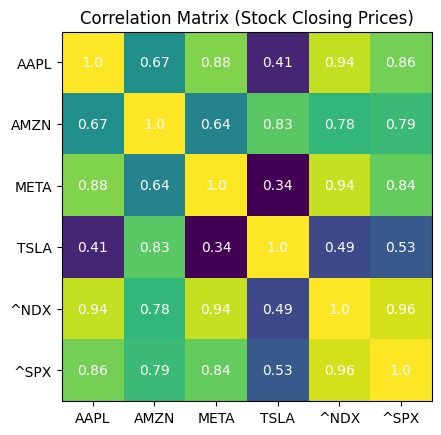

In [11]:
# Construct a 2D array of the correlation values
corr = np.zeros((6, 6))
rowi = 0
for i in range(corr_df['correlation'].count()):
    count = corr_df['ticker_x'].unique().count()
    if i > 0 and i % count == 0:
        rowi += 1
    corr[rowi][i % count] = corr_df['correlation'][i]

fig, ax = plt.subplots()
im = ax.imshow(corr) # Plot the correlation values

# Label the x and y axis
ax.set_xticks(np.arange(corr_df["ticker_x"].unique().count()), labels=corr_df["ticker_x"].unique().sort())
ax.set_yticks(np.arange(corr_df["ticker_y"].unique().count()), labels=corr_df["ticker_y"].unique().sort())

# Label the grid with value
for i in range(corr_df["ticker_x"].unique().count()):
    for j in range(corr_df["ticker_y"].unique().count()):
        ax.text(j, i, np.round(corr[i, j], 2), ha="center", va="center", color="w")

plt.title("Correlation Matrix (Stock Closing Prices)")
plt.show()

From the plot above we can see that the stocks that we are considering are generally well correlated except for **TSLA**.

### Writing a custom PyTorch Dataset class

In order to use our dataset with PyTorch we need to write a class that extends PyTorch's `Dataset` class so it plays well with the `DataLoader` and the rest of PyTorch's ecosystem.

In [29]:
class StockDataset(Dataset):
    """
    """
    def __init__(self, df: pl.DataFrame):
        self.df = df.with_columns(timestamp=pl.col("timestamp").to_physical()) # Convert the datetime column to UNIX Epoch
        
    def __len__(self):
        return self.df.select(pl.len()).item()

    def __getitem__(self, idx: int):
        return self.df[idx].to_numpy()

In [30]:
dataset = StockDataset(df)
dataloader = DataLoader(dataset=dataset, batch_size=4)

In [32]:
for batch in dataloader:
    print(batch)

tensor([[[1.6412e+12, 4.7966e+03, 1.6502e+04, 1.7972e+02, 1.7040e+02,
          3.3818e+02, 3.9993e+02]],

        [[1.6413e+12, 4.7935e+03, 1.6280e+04, 1.7744e+02, 1.6752e+02,
          3.3617e+02, 3.8320e+02]],

        [[1.6414e+12, 4.7006e+03, 1.5772e+04, 1.7272e+02, 1.6436e+02,
          3.2383e+02, 3.6271e+02]],

        [[1.6414e+12, 4.6960e+03, 1.5765e+04, 1.6984e+02, 1.6325e+02,
          3.3211e+02, 3.5490e+02]]], dtype=torch.float64)
tensor([[[1.6415e+12, 4.6770e+03, 1.5592e+04, 1.7001e+02, 1.6255e+02,
          3.3144e+02, 3.4232e+02]],

        [[1.6418e+12, 4.6703e+03, 1.5614e+04, 1.7003e+02, 1.6149e+02,
          3.2772e+02, 3.5271e+02]],

        [[1.6419e+12, 4.7131e+03, 1.5844e+04, 1.7288e+02, 1.6536e+02,
          3.3402e+02, 3.5480e+02]],

        [[1.6420e+12, 4.7264e+03, 1.5905e+04, 1.7333e+02, 1.6521e+02,
          3.3291e+02, 3.6874e+02]]], dtype=torch.float64)
tensor([[[1.6420e+12, 4.6590e+03, 1.5496e+04, 1.7003e+02, 1.6121e+02,
          3.2613e+02, 3.4385e+02